##  feature Engineering 

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv("data/fake_job_posting_cleaned.csv")

In [4]:
df.head()

,job_id,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent,full_text
0,1,0,1,0,other,internship,unknown,0,"Marketing Intern We're Food52, and we've creat..."
1,2,0,1,0,full-time,not applicable,unknown,0,Customer Service - Cloud Video Production 90 S...
2,3,0,1,0,other,unknown,unknown,0,Commissioning Machinery Assistant (CMA) Valor ...
3,4,0,1,0,full-time,mid-senior level,bachelor's degree,0,Account Executive - Washington DC Our passion ...
4,5,0,1,1,full-time,mid-senior level,bachelor's degree,0,Bill Review Manager SpotSource Solutions LLC i...


In [5]:
# Standardize categorical columns
for col in ['employment_type', 'required_experience', 'required_education']:
    df[col] = df[col].str.lower().str.strip()

# Re-check unique counts after standardization
for col in ['employment_type', 'required_experience', 'required_education' ]:
    print(f"{col}: {df[col].nunique()} unique values")

employment_type: 5 unique values
required_experience: 8 unique values
required_education: 13 unique values


In [6]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
employment_encoded = ohe.fit_transform(df[['employment_type']])
emp_df = pd.DataFrame(employment_encoded, columns=ohe.get_feature_names_out(['employment_type']))


In [7]:
df = pd.concat([df.drop(['employment_type'], axis=1), emp_df], axis=1)

In [8]:
experience_order = {
    "unknown": 0,
    "internship": 1,
    "entry level": 2,
    "associate": 3,
    "mid-senior level": 4,
    "director": 5,
    "executive": 6,
    "not applicable": 0
}
df['required_experience_encoded'] = df['required_experience'].map(experience_order)

In [9]:
education_order = {
    "unknown": 0,
    "some high school coursework": 1,
    "high school or equivalent": 2,
    "vocational - hs diploma": 3,
    "vocational": 4,
    "some college coursework completed": 5,
    "associate degree": 6,
    "bachelor's degree": 7,
    "vocational - degree": 8,
    "master's degree": 9,
    "professional": 10,
    "doctorate": 11,
    "certification": 12
}

df['required_education_encoded'] = df['required_education'].map(education_order)

In [10]:
df.head()

,job_id,telecommuting,has_company_logo,has_questions,required_experience,required_education,fraudulent,full_text,employment_type_contract,employment_type_full-time,employment_type_other,employment_type_part-time,employment_type_temporary,required_experience_encoded,required_education_encoded
0,1,0,1,0,internship,unknown,0,"Marketing Intern We're Food52, and we've creat...",0.0,0.0,1.0,0.0,0.0,1,0
1,2,0,1,0,not applicable,unknown,0,Customer Service - Cloud Video Production 90 S...,0.0,1.0,0.0,0.0,0.0,0,0
2,3,0,1,0,unknown,unknown,0,Commissioning Machinery Assistant (CMA) Valor ...,0.0,0.0,1.0,0.0,0.0,0,0
3,4,0,1,0,mid-senior level,bachelor's degree,0,Account Executive - Washington DC Our passion ...,0.0,1.0,0.0,0.0,0.0,4,7
4,5,0,1,1,mid-senior level,bachelor's degree,0,Bill Review Manager SpotSource Solutions LLC i...,0.0,1.0,0.0,0.0,0.0,4,7


In [11]:
df = df.drop([ 'required_experience', 'required_education'], axis=1)

In [12]:
df.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,full_text,employment_type_contract,employment_type_full-time,employment_type_other,employment_type_part-time,employment_type_temporary,required_experience_encoded,required_education_encoded
0,1,0,1,0,0,"Marketing Intern We're Food52, and we've creat...",0.0,0.0,1.0,0.0,0.0,1,0
1,2,0,1,0,0,Customer Service - Cloud Video Production 90 S...,0.0,1.0,0.0,0.0,0.0,0,0
2,3,0,1,0,0,Commissioning Machinery Assistant (CMA) Valor ...,0.0,0.0,1.0,0.0,0.0,0,0
3,4,0,1,0,0,Account Executive - Washington DC Our passion ...,0.0,1.0,0.0,0.0,0.0,4,7
4,5,0,1,1,0,Bill Review Manager SpotSource Solutions LLC i...,0.0,1.0,0.0,0.0,0.0,4,7


## now the text feature

In [13]:
df['full_text']=df['full_text'].str.lower()

In [14]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     D:\Data_Science\NLP_for_ml\venv\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from bs4 import BeautifulSoup

In [ ]:
df['full_text'] = df['full_text'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://\S+', '', x))
df['full_text']=df['full_text'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
df['full_text'] = df['full_text'].apply(lambda x: " ".join(x.split()))
df['full_text'] = df['full_text'].apply(lambda x: " ".join([w for w in x.split() if w not in stopwords.words('english')]))

In [18]:

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = " ".join(text.split())
    # Remove stopwords
    text = " ".join([w for w in text.split() if w.lower() not in stop_words])
    return text

df['full_text'] = df['full_text'].apply(clean_text)


In [19]:
df['full_text']

0        marketing intern food52, created groundbreakin...
1        customer service - cloud video production 90 s...
2        commissioning machinery assistant (cma) valor ...
3        account executive - washington dc passion impr...
4        bill review manager spotsource solutions llc g...
                               ...                        
17875    account director - distribution vend looking a...
17876    payroll accountant weblinc e-commerce platform...
17877    project cost control staff engineer - cost con...
17878    graphic designer nemsia studios looking experi...
17879    web application developers vend looking awesom...
Name: full_text, Length: 17880, dtype: object

In [20]:
from nltk.stem import WordNetLemmatizer

In [21]:
lemmatizer=WordNetLemmatizer()

In [22]:
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [23]:
df['full_text']=df['full_text'].apply(lambda x:lemmatize_words(x))

In [24]:
df['full_text'].head()

0    marketing intern food52, created groundbreakin...
1    customer service - cloud video production 90 s...
2    commissioning machinery assistant (cma) valor ...
3    account executive - washington dc passion impr...
4    bill review manager spotsource solution llc gl...
Name: full_text, dtype: object

In [25]:
df.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,full_text,employment_type_contract,employment_type_full-time,employment_type_other,employment_type_part-time,employment_type_temporary,required_experience_encoded,required_education_encoded
0,1,0,1,0,0,"marketing intern food52, created groundbreakin...",0.0,0.0,1.0,0.0,0.0,1,0
1,2,0,1,0,0,customer service - cloud video production 90 s...,0.0,1.0,0.0,0.0,0.0,0,0
2,3,0,1,0,0,commissioning machinery assistant (cma) valor ...,0.0,0.0,1.0,0.0,0.0,0,0
3,4,0,1,0,0,account executive - washington dc passion impr...,0.0,1.0,0.0,0.0,0.0,4,7
4,5,0,1,1,0,bill review manager spotsource solution llc gl...,0.0,1.0,0.0,0.0,0.0,4,7


In [26]:
df.drop(columns=['job_id'], inplace=True)


In [27]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,full_text,employment_type_contract,employment_type_full-time,employment_type_other,employment_type_part-time,employment_type_temporary,required_experience_encoded,required_education_encoded
0,0,1,0,0,"marketing intern food52, created groundbreakin...",0.0,0.0,1.0,0.0,0.0,1,0
1,0,1,0,0,customer service - cloud video production 90 s...,0.0,1.0,0.0,0.0,0.0,0,0
2,0,1,0,0,commissioning machinery assistant (cma) valor ...,0.0,0.0,1.0,0.0,0.0,0,0
3,0,1,0,0,account executive - washington dc passion impr...,0.0,1.0,0.0,0.0,0.0,4,7
4,0,1,1,0,bill review manager spotsource solution llc gl...,0.0,1.0,0.0,0.0,0.0,4,7


In [30]:
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
numeric_df.corr()



,telecommuting,has_company_logo,has_questions,fraudulent,employment_type_contract,employment_type_full-time,employment_type_other,employment_type_part-time,employment_type_temporary,required_experience_encoded,required_education_encoded
telecommuting,1.000000,-0.019836,0.020345,0.034523,0.061905,-0.035566,-0.002476,0.014460,-0.019959,0.033924,-0.021111
has_company_logo,-0.019836,1.000000,0.233932,-0.261971,0.027283,0.027778,-0.058189,0.000097,0.023239,0.131221,0.134865
has_questions,0.020345,0.233932,1.000000,-0.091627,0.100808,-0.063046,0.000445,0.001679,0.012122,0.044791,0.117282
fraudulent,0.034523,-0.261971,-0.091627,1.000000,-0.027815,-0.039762,0.049457,0.044686,-0.021853,-0.058814,-0.055658
employment_type_contract,0.061905,0.027283,0.100808,-0.027815,1.000000,-0.415882,-0.155872,-0.065933,-0.035680,-0.058995,0.184529
employment_type_full-time,-0.035566,0.027778,-0.063046,-0.039762,-0.415882,1.000000,-0.695714,-0.294282,-0.159253,0.446778,0.221600
employment_type_other,-0.002476,-0.058189,0.000445,0.049457,-0.155872,-0.695714,1.000000,-0.110297,-0.059688,-0.457381,-0.361641
employment_type_part-time,0.014460,0.000097,0.001679,0.044686,-0.065933,-0.294282,-0.110297,1.000000,-0.025248,-0.041781,-0.042673
employment_type_temporary,-0.019959,0.023239,0.012122,-0.021853,-0.035680,-0.159253,-0.059688,-0.025248,1.000000,-0.023999,-0.016905
required_experience_encoded,0.033924,0.131221,0.044791,-0.058814,-0.058995,0.446778,-0.457381,-0.041781,-0.023999,1.000000,0.416392


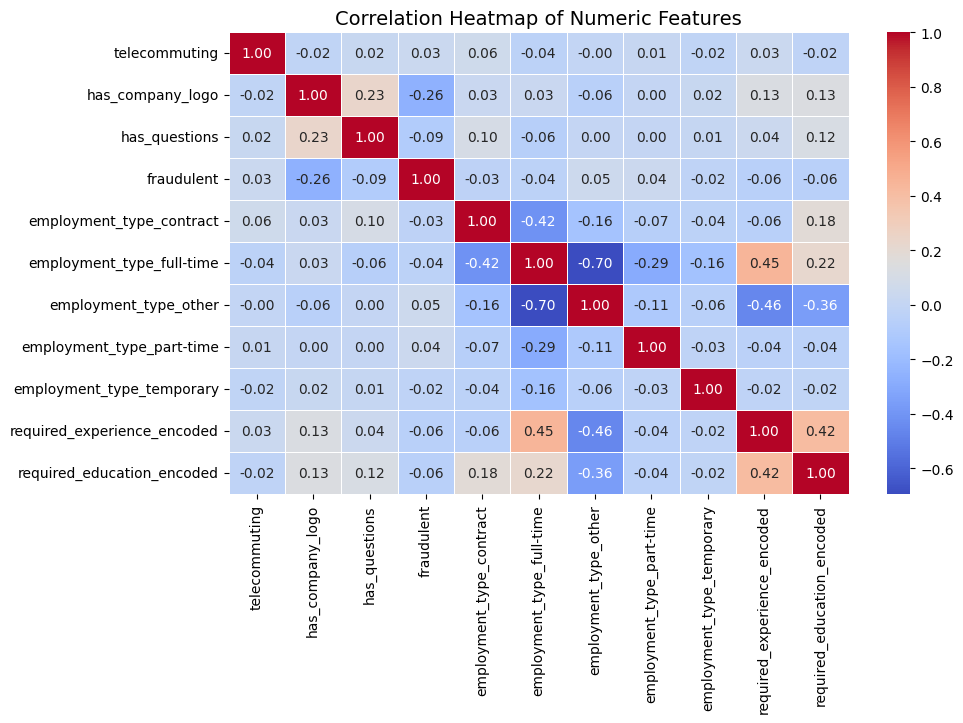

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

In [76]:
fraud_jobs = df[df['fraudulent'] == 1]['full_text']

# Display them
for i, text in enumerate(fraud_jobs, start=1):
    print(f"{i}. {text}\n")

1. ic&e technician staffing &amp; recruiting done right oil &amp; energy industry!represented candidate automatically granted following perks: expert negotiation behalf, maximizing compensation package implimenting ongoing increase significant signing bonus refined resource (in addition potential signing bonus client company offer)1 year access anyperk: significant corporate discount cell phones, event tickets, house cleaning everything inbetween. save thousand daily expenditure professional relocation service town candidates* candidate encouraged participate referral bonus program ranging anywhere $500 - $1,000 successfully hired candidates... referred directly refined resource teamplease submit referral via online referral formthank look forward working soon! [ click enlarge image ] ic&amp;e technician | bakersfield, ca mt. posoprincipal duty responsibilities: calibrates, tests, maintains, troubleshoots, installs power plant instrumentation, control system electrical equipment.perfor

In [62]:
X = df.drop('fraudulent', axis=1)
y = df['fraudulent'] 

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.20)

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(max_features=10000)
X_train_bow=bow.fit_transform(X_train['full_text']).toarray()
X_test_bow=bow.transform(X_test['full_text']).toarray()

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf=tfidf.fit_transform(X_train['full_text']).toarray()
X_test_tfidf=tfidf.transform(X_test['full_text']).toarray()

In [66]:
# Suppose 'full_text' is your text column
text_cols = ['full_text']  # can include multiple text columns if needed

# Select all other columns
X_train_other = X_train.drop(columns=text_cols).values
X_test_other = X_test.drop(columns=text_cols).values


In [67]:
import numpy as np

X_train_final_bow = np.hstack([X_train_bow, X_train_other])
X_test_final_bow = np.hstack([X_test_bow, X_test_other])

In [68]:
X_train_final_tfidf = np.hstack([X_train_tfidf, X_train_other])
X_test_final_tfidf = np.hstack([X_test_tfidf, X_test_other])

In [69]:
from sklearn.naive_bayes import GaussianNB
nb_model_bow=GaussianNB().fit(X_train_final_bow,y_train)
nb_model_tfidf=GaussianNB().fit(X_train_final_tfidf,y_train)

In [70]:
y_pred_bow=nb_model_bow.predict(X_test_final_bow)

In [71]:
y_pred_tfidf=nb_model_bow.predict(X_test_final_tfidf)

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [73]:
print("BOW accuracy: ",accuracy_score(y_test,y_pred_bow))

BOW accuracy:  0.9739932885906041


In [74]:
print("TFIDF accuracy: ",accuracy_score(y_test,y_pred_tfidf))

TFIDF accuracy:  0.9739932885906041


##In this study, I first preprocessed and encoded all categorical features appropriately. For the textual data, I experimented with both Bag-of-Words (BoW) and TF-IDF representations. Interestingly, both approaches yielded excellent and comparable accuracy, demonstrating that the text features are highly informative for the classification task.

With the preprocessing and feature engineering validated, the next step is to explore multiple machine learning models to identify the best-performing algorithm and finalize a robust predictive model for the dataset.